Código baseado em https://nbviewer.jupyter.org/github/InsightLab/imersao-ciencia-de-dados/blob/master/2019/03-Aprendizado_nao_Supervisionado/Notebook_Clustering_Answer.ipynb
 Link do vídeo: https://youtu.be/wpf4mk2oc4w 

In [1]:
import numpy as np 
import pandas as pd 
import math
from matplotlib import pyplot as plt 
from sklearn import datasets
from sklearn.cluster import DBSCAN

In [2]:
# # Scikit Learning Clusterização Aglomerativa
from sklearn.cluster import AgglomerativeClustering
# # SciPy Clusterização hierarquica (dendogramas)
from scipy.cluster import hierarchy

### Clusterização Hierárquica

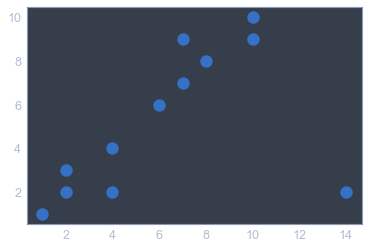

In [3]:
# Dataset
tmp_data = np.array([[1,1],[2,2],[2,3],[4,4],
                     [4,2],[6,6],[10,9],[7,7],
                     [8,8],[7,9],[10,10],[14,2]])

plt.scatter(tmp_data[:,0], tmp_data[:,1], s=150)
plt.show()

#### Aglomerativa


Linkage pode ser = {“ward”, “complete”, “average”, “single”}

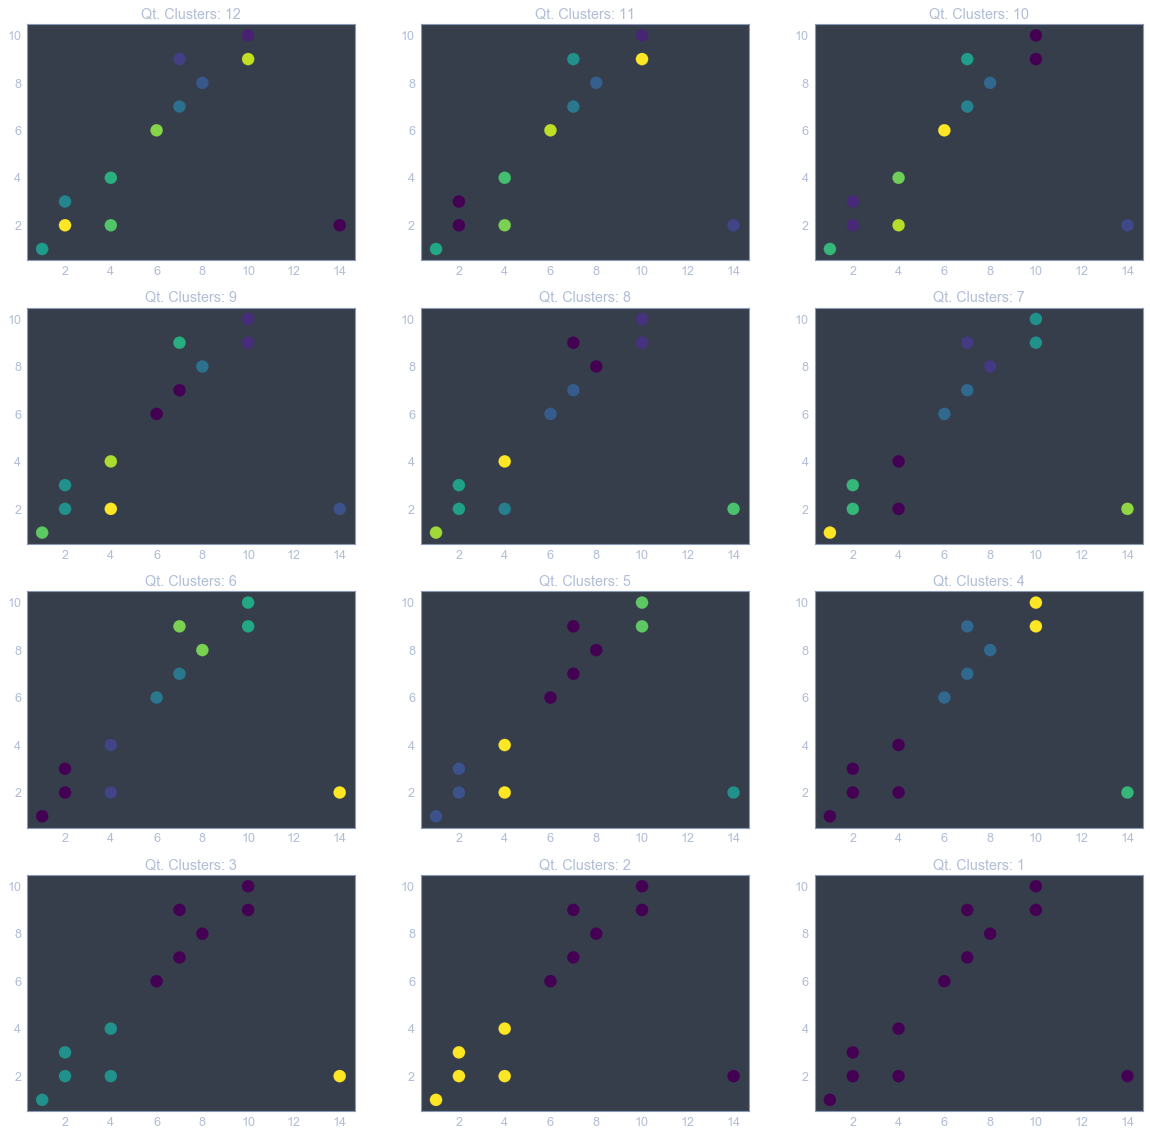

In [4]:
# Teste diferentes funções de ligações
# {“ward”, “complete”, “average”}
linkage = 'ward'

# Clusterização hierárquica
ag_model = AgglomerativeClustering(linkage=linkage)

# Número de colunas do plot
plot_col = 3

n_rows, n_col = tmp_data.shape
fig, ax = plt.subplots(nrows=math.ceil(len(tmp_data)/plot_col), 
                       ncols=plot_col,figsize=(20,20))

count = 0
for n_clusters in range(len(tmp_data),0,-1):
    index = abs(n_clusters - len(tmp_data))
    
    # Atribui o número de clusters
    ag_model.n_clusters = n_clusters
    # Ajusta o modelo
    ag_model = ag_model.fit(tmp_data)
    
    if plot_col == 1:
        ax[count].scatter(tmp_data[:,0], tmp_data[:,1], c=ag_model.labels_, s=150)
        ax[count].set_title("Qt. Clusters: " + str(n_clusters))
    else:
        ax[count, (index)%plot_col].scatter(tmp_data[:,0], tmp_data[:,1], c=ag_model.labels_, s=150)
        ax[count, (index)%plot_col].set_title("Qt. Clusters: " + str(n_clusters))
    
    if (index+1) % plot_col == 0:
        count += 1     
        
plt.show()

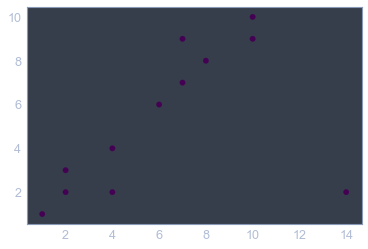

In [5]:
plt.scatter(tmp_data[:,0], tmp_data[:,1], c=ag_model.labels_)

#### Divisiva


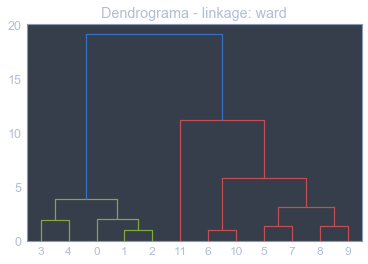

In [6]:
plt.figure()
plt.title("Dendrograma - linkage: ward")
dn = hierarchy.dendrogram(hierarchy.ward(tmp_data))

## DBSCAN

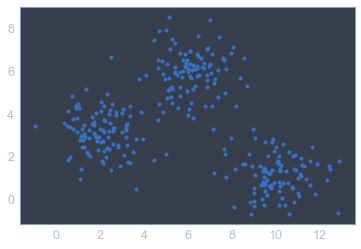

In [7]:
dataset = pd.read_csv('dataset.csv', header=None)
dataset = np.array(dataset)

plt.scatter(dataset[:,0], dataset[:,1], s=15)
plt.show()

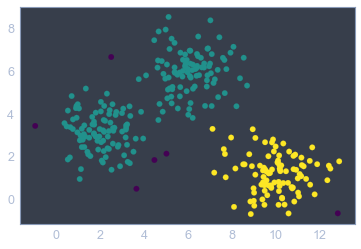

In [8]:
ag_model = DBSCAN(eps=1, min_samples=3)
ag_model.fit(dataset)

plt.scatter(dataset[:,0], dataset[:,1], c=ag_model.labels_)
plt.show()

Produzido por: Victória Maia